In [1]:
# 출력이 너무 길어지지 않게하기 위해 찍지 않도록 했으나 
# 실제 학습 할 때는 아래 두 줄을 주석처리 하는 것을 권장한다.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


In [68]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 워드클라우드를 위한 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# 워드클라우드를 위한 나눔고딕 경로 설정
import matplotlib.font_manager as fm
fontpath = './font/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [79]:
# konlpy 기반 tokenizer 갖고 오기
from konlpy.tag import Okt, Mecab
Okt_tokenizer = Okt()
mecab_tokenizer = Mecab()

In [4]:
# pandas 설정: 모든 row와 모든 column을 출력하게 하고, 각 column 별 출력되는 글자수는 50자 이내
pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', 50)

In [6]:
# 위의 설정으로 간단하게 보는 df_specific
df_specific = pd.read_csv("./data_wrangled/df_specific_wrangle.csv", encoding="utf-8")
df_specific.head(3)

,대학코드,대학명,gen_info,env_info,food_info,study_info,office_info,facil_info,mhct_info,help_info,etc_info
0,AR000004,Universidad del Salvador,아르헨티나의 대다수 대학교는 한국처럼 캠퍼스가 있는 것이 아니라 도시 내에 몇개의 ...,대학교가 도시 여러곳에 분포하고 있으므로 각기 다르다. 하지만 남녀를 불문하고 부에...,기숙사는 학교에서 제공하지 않고 두가지 옵션이 주어진다. 홈스테이 혹은 게스트 하우...,아르헨티나에서의 대학 수업은 주로 오전 혹은 저녁에 있다. 대부분의 학생들이 일을하...,EL SALVADOR대학교는 국제 교육부가 잘 되있는 학교이다. 아르헨티나 대학교들...,부대시설로는 헬스장이 있다고 알고 있으나 시내와 먼 곳에 있었다. 동아리는 몇가지 ...,딱히 컬쳐쇼크를 받을 만 한 요소는 없었던 것 같다. 하지만 처음에 언어적인 면에서...,"살바도르 대학교 국제처에서 비자문제나 숙소문제(홈스테이경우) 등은 해결해 주고, 특...",NaN
1,AU000019,Australian National University,"ANU has a very big campus, but unlike Yonsei, ...","The city center, called CIVIC, is 20min walk a...","There are many housing options, but I chose to...","In my personal opinions, classes are generally...","Overall, I did not have to ask for help much f...","There were many clubs for you to join at ANU, ...",I did have some culture shock during my first ...,"I was helped a lot, especially during the firs...","Overall, my stay in Australia has been nothing..."
2,AU000001,Bond University,"Bond대학교는 휴양지로 유명한 골드코스트에 위치해있습니다. 서퍼스 파라다이스, 브...",학교 주변은 조용하고 깨끗한 평화로운 전원마을의 느낌입니다. 학교에서 5분정도 걸어...,거주형태는 크게 On Campus와 Off Campus로 나뉩니다. 저는 기숙사에 ...,"수업은 보통 4개의 수업을 듣습니다. 저는 Chinese1, Australian p...",교환생활 중 국제교육부와 연락할 일은 없었습니다. 교환학생을 가서 따로 국제교육부와...,학기초에 동아리 박람회식으로 여러 동아리들의 부스가 세워집니다. 관심 있는 동아리에...,특별히 culture shock이라기 보다는 정말 다양한 문화를 접하는 것 자체가 ...,"수업관련해서는 교수님께 질문을 해도 친절하게 알려주시고, 또 교내에 과제나 발표준비...",Bond와 그 동네를 생각하면 여유롭고 평화로웠던 분위기가 아직도 생생해요. 여기서...


In [7]:
# 위의 설정으로 간단하게 보는 df_specific
df_specific.tail(3)

,대학코드,대학명,gen_info,env_info,food_info,study_info,office_info,facil_info,mhct_info,help_info,etc_info
467,US000273,Westminster College,"Westminster College는 미국 펜실베니아 주 북부에 있는 작은 마을, ...",웨스트민스터가 위치한 뉴윌밍턴은 매우 작은 마을입니다. 마음만 먹으면 주말에 산책을...,제가 있던 학기에는 연세대학교에서 온 학생이 총 여학생 3명이어서 모두 같은 기숙사...,"저는 한 학기 동안 5과목, 총 15학점을 들었습니다. 정치학 전공 Internat...",웨스트민스터는 국제 학생의 수가 매우 적어서 국제교육부가 따로 있지는 않았습니다. ...,제가 가장 자주 이용했던 곳은 클럽룸입니다. 이곳은 맥켈비 센터 2층 구석에 있는 ...,학교가 위치한 동네에서는 학교 학생들을 제외하면 거의 모든 주민이 백인이었습니다. ...,학교 생활 중 가장 도움을 많이 받을 수 있었던 곳은 교목실의 Internation...,"그림 같은 호수, 끝없이 넓은 하늘과 함께 따뜻한 단풍색으로 물든 웨스트민스터에서 ..."
468,US000274,Whitworth College,내가 다녀온 교환대학은 Washington State 에 위치한 Whitworth ...,Whitworth College는 Seattle에서 비행기로 40분 정도 떨어져 있...,나는 Whitworth College에서 기숙사에 살았다. ISEP으로 가게 되면 ...,내가 미국에 가기 전에 가장 두려워했던 것은 바로 수업이었다. 어학연수와는 달리 교...,이 학교에서 내가 마음 편하게 지낼 수 있었던 것은 국제교육부 스텝들이 너무 따뜻하...,"기타 학교의 부대 시설로는 fitness center, music hall, soc...",NaN,NaN,처음에 Whitworth College를 ISEP으로부터 배정 받았을 때 현실적으로...
469,US000278,Wittenberg University,Wittenberg는 Ohio주의 작은 도시 Springfield에 위치해 있다. ...,"Springfield의 downtown에는 우체국, 은행(huntington) 정도...","1,2학년과 국제학생들 (1년 이하로 있는 학생들)은 모두 기숙사에서 생활하게 된다...",도서관은 Thomas library가 main이고 다른 단과대학 건물에 독서실이 있...,"국제교류부는 Hollenbeck 건물 1층에 있는데, Joann 과 Betsy 두 ...",Wittenberg의 가장 큰 장점. nWittenberg는 학비가 무척 비싼 학교...,"한국에서는 흔치 않은 gay, lesbian, transgender 등을 만날 수 ...",Wittenberg는 국제학생들에게 host family를 붙여준다. 비록 같이 살...,이처럼 wittenberg는 시골에 있는 작은 학교지만 지리적인 위치로 인한 단점보...


In [31]:
# 순번으로 대학 데이터 뽑아내고 df -> object로 바꾸기
object_example = df_specific["gen_info"][20:21]
object_example

20    FHWN은 비교적 작은 학교입니다. 빈까지는 기차를 타면 30분에서 40분 정도 소...
Name: gen_info, dtype: object

In [32]:
# 순번으로 대학 데이터 뽑아내고 object -> string으로 바꾸기
str_example = object_example[20]
str_example

'FHWN은 비교적 작은 학교입니다. 빈까지는 기차를 타면 30분에서 40분 정도 소요됩니다. 기숙사에서 버스 타고 기차역까지 가는 시간을 포함하면 1시간 정도 걸린다고 생각하시면 됩니다. 헝가리 국경과도 근접해서, 헝가리 소프론까지는 금방 갈 수 있어요. 학교 근처 역은 civitasnova이고, 여기서 기차를 타면 중앙역에는 정말 금방(3분?) 도착합니다. 중앙역 말고도 역이 하나 더 있는데, 밤 늦게 비엔나에서 돌아올 때 그 역에서 내려서 기숙사까지 걸어오곤 했어요. 기차는 처음에 역에가서 20유로 정도 내고 학생으로 등록하면 더 싸게 이용하실 수 있습니다.저는 비너노이슈타트에서 가을과 겨울을 지냈는데, 한국과 기후가 비슷합니다. 9월, 10월에는 날씨가 좋았고, 11월부터는 추워지기 시작했던 것 같습니다. 유럽이다 보니 라디에이터가 있는데, 저는 추위를 많이 타기도 해서 방에 있으면 좀 추울 때도 있었습니다. 전기장판 얇은 거 가져가서 정말 유용하게 썼어요. 그리고 KI... FHWN의 규모는 작은 편입니다. 특정 몇몇 학과만 있다보니 건물 개수도 많지 않고, 금방 구조를 익히실 수 있습니다. 오스트리아 자체가 유럽 가운데에 있다보니 여행하기 매우 편리했고, 날씨는 다소 흐릴 때가 많았습니다. FHWN은 많이 큰 규모의 대학교는 아니에요~! 경제경영 직렬은 BCI라는 단과대로 분류되어 있는데 사실상 다른 단과대랑은 거의 교류가 없기 때문에 (간혹 기숙사에서 정규학생인 공대 친구들을 볼 수도 있겠지만...) 총 학생이 200명인 대학교에 다닌다고 상상하시면 될 것 같습니다. 그래서 세부전공인 HR, Marketing, Finance이 같은 친구들과는 거의 시간표가 겹치게 됩니다. 저는 이게 오히려 장점이라고 생각했던 것이 한 학기만 다녀도 정말 많은 정규학생 친구들을 알게 되고 친해지게 돼요. 덕분에 적응의 문제가 의외로 쉽게 해결되어서 정말 좋았습니다. 날씨는 Windy Neustadt 라고 할 정도로 바람이 많이 불어요! 저는 처음에 태풍이 온 줄 알

In [80]:
# 대학명으로 대학 데이터 뽑아내고 df -> object로 바꾸기
univ_cp
df_specific.loc[df_specific["대학코드"] == univ_code]

NameError: name 'univ_cp' is not defined

In [37]:
example_pos_okt = Okt_tokenizer.pos(str_example, norm=True, stem=True)
example_pos_okt[:10]

[('FHWN', 'Alpha'),
 ('은', 'Noun'),
 ('비교', 'Noun'),
 ('적', 'Suffix'),
 ('작다', 'Adjective'),
 ('학교', 'Noun'),
 ('이다', 'Adjective'),
 ('.', 'Punctuation'),
 ('빈', 'Noun'),
 ('까지는', 'Josa')]

In [41]:
example_pos_mecab = mecab_tokenizer.pos(str_example, flatten=True)
example_pos_mecab[:10]

[('FHWN', 'SL'),
 ('은', 'JX'),
 ('비교', 'NNG'),
 ('적', 'XSN'),
 ('작', 'VA'),
 ('은', 'ETM'),
 ('학교', 'NNG'),
 ('입니다', 'VCP+EF'),
 ('.', 'SF'),
 ('빈', 'NNG')]

In [78]:
gen_corpus = df_specific["gen_info"]
gen_corpus

하는 대학교. 더블린 대학 다음...
120    덥고 덥고 덥습니다^^; 가을이지만 정말 더워요 겨울에는 좀 쌀쌀해지니 반팔+긴팔+...
121    보코니대학교는 이탈리아의 북부 롬바르디아주의 주도인 밀라노에 위치하고 있으며, 밀라...
122    시국 때문에 딱 2주간 오프라인 수업 했는데, 캠퍼스 건물이 베니스 본섬 곳곳에 위...
123    학교의 크기는 우선 매우 작습니다. 매우 작은 학교임에도 불구하고 초등학생부터 대학...
124    Luiss Guido Carli(이하 Luiss)는 3개의 캠퍼스로 나누어져 있고 ...
125    우리학교와는 달리 캠퍼스가 곳곳에 흩어져 있습니다. Academic Curricul...
126    이탈리아 로마에서 기차로 약 1시간 45분정도의 거리에 떨어져있는 작은 마을 비테르...
127    학교 이름을 보면 알 수 있듯이 이 학교는 모데나(Modena)와 레지오 에밀리아(...
128    토리노는 관광지로 크게 발달이 되어있지 않기 때문에 유명하지는 않지만 정말 아름답고...
129    대학의 크기는 연세대학교보다 훨씬 더 작악던 것 같다. 하지만 불편을 느낄 정도로 ...
130    교환대학 아오야마 가쿠인 대학은 두 개의 캠퍼스로 이루어져 있습니다. 한 개는 우리...
131    츄오대학 타마캠퍼스는 도쿄 시내에서는 어느 정도 떨어져 있는 곳에 있습니다. 신주쿠...
132    다른 선배님들이 이전에 작성하여 주신 것과 마찬가지로, 도시샤 대학은 크게는 두 개...
133    캠퍼스 크기는 매우 큽니다! 위치는 삿포로역 바로옆에 있습니다. 하지만 봄 학기에 ...
134    캠퍼스가 여러 곳으로 나뉘어져 있습니다. 저는 도쿄 중심에 있는 캠퍼스에 다녔습니다...
135    ICU는 도쿄 미타카시에 위치합니다. 대학 캠퍼스 크기는 연세대학교 미래캠퍼스 정도...
136    International University of Japan은 도꾜에서 북쪽으로 2...
137    간사이

In [48]:
%time mecab_pos_content = mecab_tokenizer.pos(gen_corpus, flatten=True)
print(len(mecab_pos_content))
mecab_pos_content[:10]

CPU times: user 26.7 ms, sys: 539 µs, total: 27.3 ms
Wall time: 27.2 ms
10201


[('0', 'SN'),
 ('아르헨티나', 'NNP'),
 ('의', 'JKG'),
 ('대다수', 'NNG'),
 ('대학교', 'NNG'),
 ('는', 'JX'),
 ('한국', 'NNP'),
 ('처럼', 'JKB'),
 ('캠퍼스', 'NNG'),
 ('가', 'JKS')]

In [50]:
mecab_pos_content_counted = Counter(mecab_pos_content)
print(len(gen_counted))
mecab_pos_content_counted.most_common(50)

921


[(('.', 'SF'), 664),
 (('..', 'SY'), 448),
 (('는', 'JX'), 374),
 (('에', 'JKB'), 282),
 (('의', 'JKG'), 244),
 (('위치', 'NNG'), 138),
 (('학교', 'NNG'), 124),
 ((',', 'SC'), 114),
 (('대학', 'NNG'), 114),
 (('가', 'JKS'), 111),
 (('있', 'VX'), 104),
 (('은', 'JX'), 101),
 (('고', 'EC'), 97),
 (('습니다', 'EF'), 92),
 (('크기', 'NNG'), 91),
 (('대학교', 'NNG'), 88),
 (('캠퍼스', 'NNG'), 88),
 (('는', 'ETM'), 88),
 (('로', 'JKB'), 86),
 (('한', 'XSA+ETM'), 85),
 (('에서', 'JKB'), 77),
 (('이', 'JKS'), 77),
 (('도시', 'NNG'), 74),
 (('작', 'VA'), 67),
 (('하', 'XSV'), 65),
 (('University', 'SL'), 62),
 (('은', 'ETM'), 60),
 (('입니다', 'VCP+EF'), 56),
 (('이', 'VCP'), 55),
 (('있', 'VV'), 50),
 (('미국', 'NNP'), 47),
 (('연세대', 'NNP'), 44),
 (('들', 'XSN'), 44),
 (('을', 'JKO'), 44),
 (('으로', 'JKB'), 43),
 (('정도', 'NNG'), 42),
 (('(', 'SSO'), 42),
 (('건물', 'NNG'), 41),
 (('크', 'VA'), 40),
 (('해', 'XSV+EC'), 38),
 (('개', 'NNBC'), 37),
 (('지만', 'EC'), 37),
 (('를', 'JKO'), 36),
 (('of', 'SL'), 36),
 ((')', 'SSC'), 35),
 (('캠퍼스', 'NNP

In [45]:
%time  gen_nouns = mecab_tokenizer.nouns(''.join(gen_corpus))
gen_pos[:15]

CPU times: user 30.5 ms, sys: 606 µs, total: 31.1 ms
Wall time: 30.7 ms


['아르헨티나',
 '대다수',
 '대학교',
 '한국',
 '캠퍼스',
 '것',
 '도시',
 '내',
 '개',
 '대학교',
 '휴양지',
 '골드코스트',
 '위치',
 '퍼스',
 '파라다이스']

In [58]:
gen_nouns_counted = Counter(gen_nouns)
print(len(gen_nouns_counted))
gen_nouns_counted.most_common(50)

921


[('위치', 138),
 ('학교', 124),
 ('캠퍼스', 122),
 ('대학', 114),
 ('크기', 91),
 ('대학교', 88),
 ('도시', 74),
 ('미국', 47),
 ('연세대', 44),
 ('정도', 42),
 ('건물', 41),
 ('주', 41),
 ('개', 37),
 ('교환', 28),
 ('규모', 27),
 ('시간', 20),
 ('분', 20),
 ('학생', 20),
 ('것', 19),
 ('편', 19),
 ('중', 17),
 ('곳', 17),
 ('학기', 16),
 ('내', 15),
 ('제', 15),
 ('지역', 14),
 ('우리', 14),
 ('생각', 14),
 ('자체', 14),
 ('저', 14),
 ('남부', 14),
 ('연대', 14),
 ('수업', 14),
 ('런던', 13),
 ('년', 13),
 ('월', 13),
 ('중심', 13),
 ('날씨', 13),
 ('때', 12),
 ('지리', 12),
 ('수', 12),
 ('북부', 11),
 ('캠', 11),
 ('명', 11),
 ('한국', 10),
 ('캐나다', 10),
 ('도쿄', 10),
 ('영국', 10),
 ('대', 9),
 ('하나', 9)]

In [70]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = fontpath,
                        stopwords = STOPWORDS, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

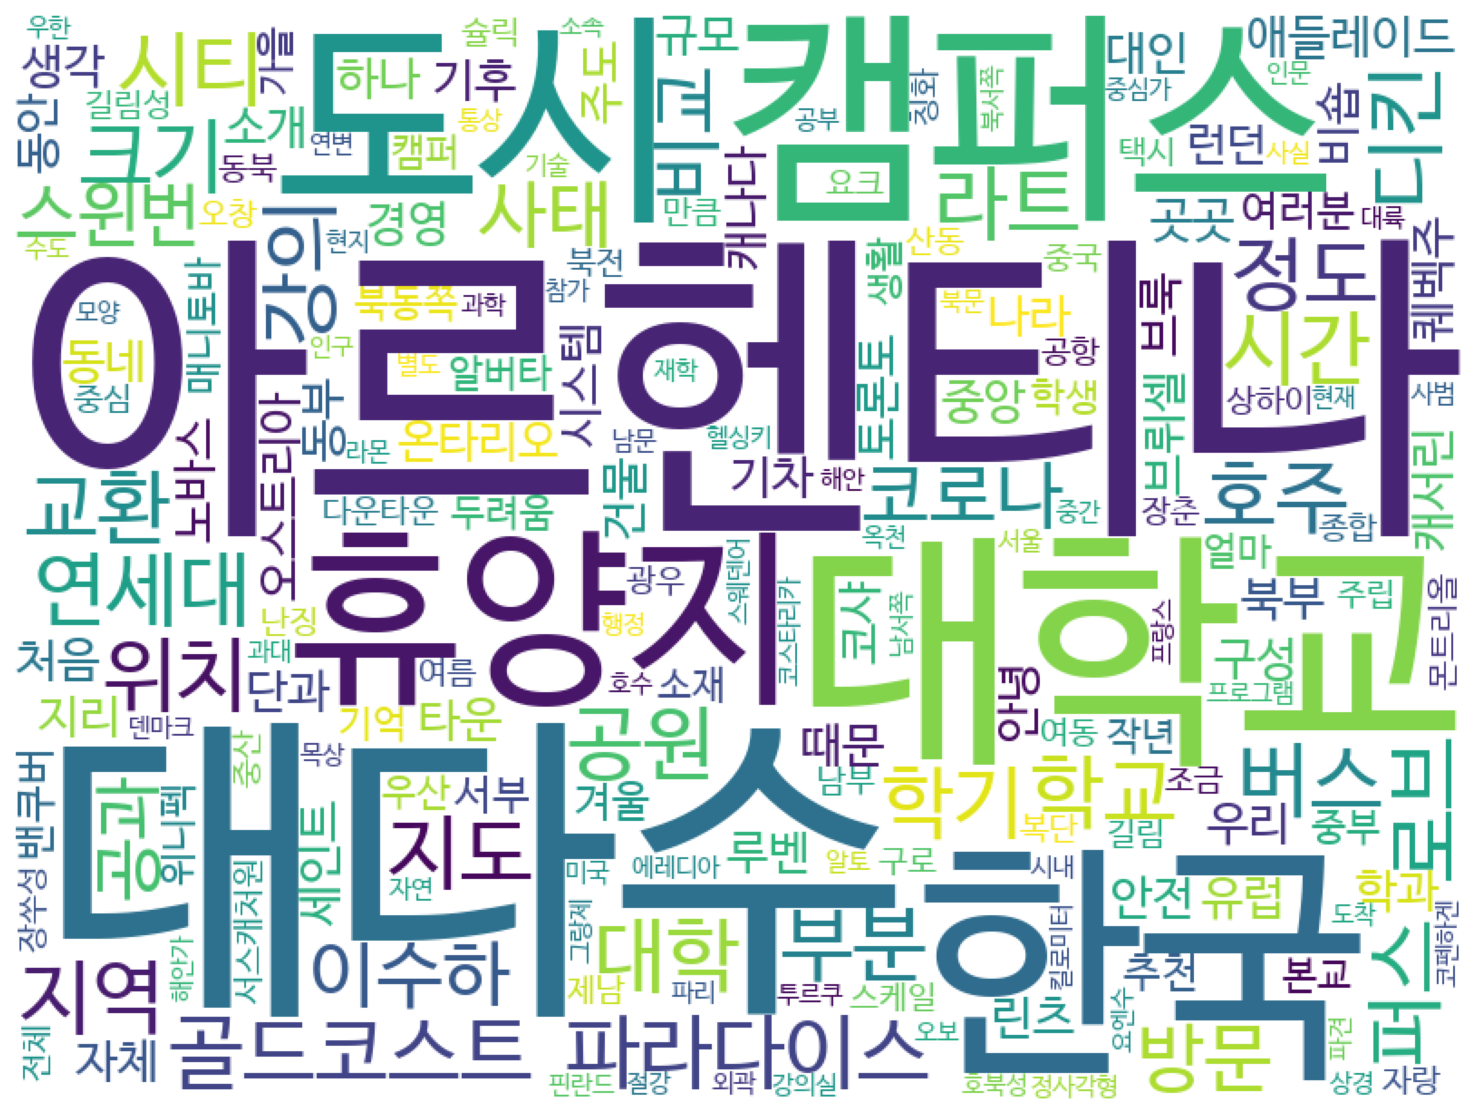

CPU times: user 1.18 s, sys: 83 ms, total: 1.26 s
Wall time: 1.26 s


In [71]:
# mecab으로 추출한 명사로 워드클라우드를 그린다.
%time displayWordCloud(' '.join(gen_nouns_counted))

In [72]:
from collections import Counter
counter = Counter(gen_corpus)

print(counter.most_common(10))
print("number of documents:", len(df_specific["gen_info"]))
print("length of text corpus:", len(gen_corpus))

[(' ', 6224), ('.', 1647), ('는', 526), ('\n', 470), ('학', 396), ('에', 385), ('e', 367), ('i', 365), ('다', 328), ('대', 321)]
number of documents: 470
length of text corpus: 26819
